<a href="https://colab.research.google.com/github/EthamMax/AI_Skin_Cancer_Detector/blob/main/Cancer_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow streamlit scikit-learn grad-cam --no-deps
!pip install tf-explain

print("Libraries installation command executed. Please wait for completion...")
print("Note: We are using '--no-deps' for grad-cam and installing tf-explain as an alternative Grad-CAM library.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.5 MB/s eta 0:00:00
Libraries installation command executed. Please wait for completion...
Note: We are using '--no-deps' for grad-cam and installing tf-explain as an alternative Grad-CAM library.


In [ ]:
import tensorflow as tf
import streamlit
import sklearn
# import grad_cam  # We will use tf_explain's Grad-CAM instead
from tf_explain.core.grad_cam import GradCAM

print(f"TensorFlow version: {tf.__version__}")
print(f"Streamlit version: {streamlit.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")
# print(f"grad-cam version: {grad_cam.__version__}") # We are not directly using grad-cam package now
print(f"tf_explain GradCAM imported: {GradCAM is not None}") # Check if GradCAM from tf_explain is imported

print("Libraries imported (and tf_explain GradCAM). Installation verified if no errors above.")

TensorFlow version: 2.18.0
Streamlit version: 1.42.1
scikit-learn version: 1.6.1
tf_explain GradCAM imported: True
Libraries imported (and tf_explain GradCAM). Installation verified if no errors above.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive mounted successfully! You can now access files in /content/drive")

Mounted at /content/drive
Google Drive mounted successfully! You can now access files in /content/drive


In [ ]:
import os
import zipfile
import subprocess  # For running gdown command

file_id = '1IzjBWV0U5AyeUE2n0YC97qqZOFmudVjS'  # File ID from your Google Drive link
zip_file_name = 'archive.zip'
zip_file_path = os.path.join('/content/', zip_file_name) # Path where zip file will be downloaded in Colab
extraction_path = '/content/' # Path to extract files to

print(f"Downloading '{zip_file_name}' from Google Drive...")

try:
    # Use gdown to download the file from Google Drive using file ID
    subprocess.run(['gdown', '--id', file_id, '--output', zip_file_path], check=True, capture_output=True)
    print(f"Successfully downloaded '{zip_file_name}' to '{zip_file_path}'")
except subprocess.CalledProcessError as e:
    print(f"Error downloading '{zip_file_name}' from Google Drive.")
    print(f"Return code: {e.returncode}")
    print(f"Stdout: {e.stdout.decode()}")
    print(f"Stderr: {e.stderr.decode()}")
    print("Please check if the sharing link is correct and the file is accessible.")
    exit() # Stop execution if download fails

print(f"Extracting '{zip_file_name}'...")
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_path)
    print(f"Successfully extracted '{zip_file_name}' to '{extraction_path}'")
except FileNotFoundError:
    print(f"Error: Zip file not found at '{zip_file_path}'. This should not happen if download was successful.")
except zipfile.BadZipFile:
    print(f"Error: '{zip_file_name}' is not a valid zip file or is corrupted.")
except Exception as e:
    print(f"An unexpected error occurred during extraction: {e}")

# After extraction, let's list the files in the extraction directory to confirm
print("\nFiles and folders after extraction:")
extracted_files = os.listdir(extraction_path)
for item in extracted_files:
    print(f"- {item}")

print("\nDataset download and extraction process complete.")

Successfully downloaded 'archive.zip' to '/content/archive.zip'
Extracting 'archive.zip'...
Successfully extracted 'archive.zip' to '/content/'

Files and folders after extraction:
- .config
- ham10000_images_part_1
- hmnist_28_28_RGB.csv
- hmnist_28_28_L.csv
- HAM10000_images_part_1
- drive
- archive.zip
- HAM10000_metadata.csv
- HAM10000_images_part_2
- hmnist_8_8_RGB.csv
- hmnist_8_8_L.csv
- ham10000_images_part_2
- sample_data

Dataset download and extraction process complete.


In [ ]:
import pandas as pd
import os

metadata_file_path = '/content/HAM10000_metadata.csv' # Path to metadata file

try:
    df_metadata = pd.read_csv(metadata_file_path)
    print("Metadata CSV file loaded successfully into a DataFrame.")
except FileNotFoundError:
    print(f"Error: Metadata file not found at '{metadata_file_path}'. Check if extraction in Step 2.3 was successful.")
    df_metadata = None
except pd.errors.ParserError as e:
    print(f"Error parsing metadata CSV file: {e}")
    print("There might be issues with the CSV format.")
    df_metadata = None
except Exception as e:
    print(f"An unexpected error occurred while loading metadata: {e}")
    df_metadata = None

if df_metadata is not None:
    print("\nDataFrame Info:")
    df_metadata.info() # Display DataFrame info (columns, data types, memory usage, etc.)

    print("\nFirst 10 rows of the metadata:")
    print(df_metadata.head(10)) # Display the first 10 rows to get a glimpse of the data

Metadata CSV file loaded successfully into a DataFrame.

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB

First 10 rows of the metadata:
     lesion_id      image_id   dx dx_type   age     sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0    male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0    male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0    male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0    male        scalp
4

In [ ]:
if df_metadata is not None: # Check if metadata DataFrame is loaded
    diagnosis_counts = df_metadata['dx'].value_counts()
    print("Unique Diagnosis Categories and Counts:")
    print(diagnosis_counts)

    print("\nNumber of unique diagnosis categories:", len(diagnosis_counts))
else:
    print("Metadata DataFrame is not loaded. Please run Step 3.1 first.")

Unique Diagnosis Categories and Counts:
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

Number of unique diagnosis categories: 7


In [ ]:
if df_metadata is not None: # Check if metadata DataFrame is loaded
    # Get unique diagnosis categories from the 'dx' column
    diagnosis_categories = sorted(df_metadata['dx'].unique())

    # Create a dictionary to map diagnosis categories to numerical labels
    diagnosis_label_mapping = {category: label_index for label_index, category in enumerate(diagnosis_categories)}

    # Create a reverse mapping as well, to convert numerical labels back to category names if needed
    label_diagnosis_mapping = {label_index: category for label_index, category in enumerate(diagnosis_categories)}

    # Print the mappings to see them
    print("Diagnosis Category to Label Mapping:")
    print(diagnosis_label_mapping)
    print("\nLabel to Diagnosis Category Mapping:")
    print(label_diagnosis_mapping)

    # Add a new column 'label' to the metadata DataFrame with numerical labels
    df_metadata['label'] = df_metadata['dx'].map(diagnosis_label_mapping)

    # Display the first few rows with the new 'label' column
    print("\nMetadata DataFrame with 'label' column (first 5 rows):")
    print(df_metadata[['dx', 'label']].head()) # Show 'dx' and the new 'label' column

else:
    print("Metadata DataFrame is not loaded. Please run Step 3.1 first.")

Diagnosis Category to Label Mapping:
{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

Label to Diagnosis Category Mapping:
{0: 'akiec', 1: 'bcc', 2: 'bkl', 3: 'df', 4: 'mel', 5: 'nv', 6: 'vasc'}

Metadata DataFrame with 'label' column (first 5 rows):
    dx  label
0  bkl      2
1  bkl      2
2  bkl      2
3  bkl      2
4  bkl      2


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
IMG_SIZE = (224, 224) # Consistent image size for MobileNetV2 input
BATCH_SIZE = 32      # You can adjust batch size based on your Colab GPU memory

# Data augmentation for training - more aggressive for minority classes can be added here later
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to [0, 1]
    rotation_range=20,      # Random rotations
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    shear_range=0.2,        # Shear transformations
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Horizontal flips
    fill_mode='nearest'     # Filling in newly created pixels
)

# No or minimal augmentation for validation (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255) # Just rescale for validation

print("ImageDataGenerators for training and validation created.")
print("Data augmentation defined for training data.")

ImageDataGenerators for training and validation created.
Data augmentation defined for training data.


In [ ]:
import os

if df_metadata is not None: # Check if metadata DataFrame is loaded
    # Define base paths for image folders
    image_folder_part1 = '/content/HAM10000_images_part_1'
    image_folder_part2 = '/content/HAM10000_images_part_2'

    # Function to create full image path based on image_id
    def get_image_path(image_id):
        part1_path = os.path.join(image_folder_part1, image_id + '.jpg')
        part2_path = os.path.join(image_folder_part2, image_id + '.jpg')
        if os.path.exists(part1_path):
            return part1_path
        elif os.path.exists(part2_path):
            return part2_path
        else:
            return None # Or raise an error if you want to enforce all images to be found

    # Create a new column 'image_path' in the metadata DataFrame
    df_metadata['image_path'] = df_metadata['image_id'].apply(get_image_path)

    # Verify if image paths are created correctly - print first 5 rows with image paths
    print("First 5 rows of metadata with image paths:")
    print(df_metadata[['image_id', 'image_path']].head())

    # Check for any missing image paths (if any images were not found)
    missing_paths_count = df_metadata['image_path'].isnull().sum()
    if missing_paths_count > 0:
        print(f"\nWarning: {missing_paths_count} image paths are missing (images not found).")
    else:
        print("\nAll image paths successfully created.")

else:
    print("Metadata DataFrame is not loaded. Please run Step 3.1 first.")

First 5 rows of metadata with image paths:
       image_id                                        image_path
0  ISIC_0027419  /content/HAM10000_images_part_1/ISIC_0027419.jpg
1  ISIC_0025030  /content/HAM10000_images_part_1/ISIC_0025030.jpg
2  ISIC_0026769  /content/HAM10000_images_part_1/ISIC_0026769.jpg
3  ISIC_0025661  /content/HAM10000_images_part_1/ISIC_0025661.jpg
4  ISIC_0031633  /content/HAM10000_images_part_2/ISIC_0031633.jpg

All image paths successfully created.


In [ ]:
from sklearn.model_selection import train_test_split

if df_metadata is not None: # Check if metadata DataFrame is loaded
    # Split metadata DataFrame into training and validation sets
    train_df, val_df = train_test_split(df_metadata, test_size=0.2, stratify=df_metadata['label'], random_state=42)

    print(f"Training DataFrame size: {len(train_df)}")
    print(f"Validation DataFrame size: {len(val_df)}")

    # Create data generators using flow_from_dataframe
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col='image_path',       # Column with image paths
        y_col='label',            # Column with labels (numerical labels)
        target_size=IMG_SIZE,      # Resize images to IMG_SIZE
        batch_size=BATCH_SIZE,
        class_mode='categorical', # For multi-class classification
        seed=42                    # For reproducibility
    )

    val_generator = val_datagen.flow_from_dataframe(
        dataframe=val_df,
        x_col='image_path',
        y_col='label',
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        seed=42,
        shuffle=False          # No shuffling for validation data
    )

    print("\nTraining and validation data generators created.")
    print(f"Training generator class indices: {train_generator.class_indices}") # Mapping of label names to index
    print(f"Validation generator class indices: {val_generator.class_indices}") # Should be the same as training
else:
    print("Metadata DataFrame is not loaded. Please run Step 3.1 first.")

Training DataFrame size: 8012
Validation DataFrame size: 2003
Found 8012 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.

Training and validation data generators created.
Training generator class indices: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6}
Validation generator class indices: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6}


In [ ]:
if df_metadata is not None: # Check if metadata DataFrame is loaded
    print("Data type of 'label' column before conversion:")
    print(df_metadata['label'].dtype)

    # Convert 'label' column to string type
    df_metadata['label'] = df_metadata['label'].astype(str)
    train_df['label'] = train_df['label'].astype(str) # Apply to train_df as well
    val_df['label'] = val_df['label'].astype(str)     # Apply to val_df as well


    print("\nData type of 'label' column after conversion to string:")
    print(df_metadata['label'].dtype)

    print("\nFirst 5 rows of DataFrame with string labels:")
    print(df_metadata[['dx', 'label']].head()) # Show 'dx' and 'label' columns

else:
    print("Metadata DataFrame is not loaded. Please run Step 3.1 first.")

Data type of 'label' column before conversion:
int64

Data type of 'label' column after conversion to string:
object

First 5 rows of DataFrame with string labels:
    dx label
0  bkl     2
1  bkl     2
2  bkl     2
3  bkl     2
4  bkl     2


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Load pre-trained MobileNetV2 base model (excluding top classification layers)
base_model = MobileNetV2(
    weights='imagenet',      # Load weights pre-trained on ImageNet
    include_top=False,       # Do not include the classification layers at the top
    input_shape=IMG_SIZE + (3,) # Input shape: (IMG_SIZE, IMG_SIZE, 3) - 3 channels for RGB
)

# Freeze the layers of the base model - very important for transfer learning
base_model.trainable = False # Set base_model layers to non-trainable

# Create the classification head - layers to add on top of MobileNetV2
global_average_pooling = layers.GlobalAveragePooling2D()(base_model.output) # Get output of base model and apply GAP
dropout_layer = layers.Dropout(0.5)(global_average_pooling) # Dropout for regularization
dense_layer_1 = layers.Dense(128, activation='relu')(dropout_layer) # Dense layer with ReLU activation
output_layer = layers.Dense(7, activation='softmax')(dense_layer_1) # Output layer with softmax for 7 classes

# Construct the final model
model = models.Model(inputs=base_model.input, outputs=output_layer)

# Print model summary to see the architecture
print("Model Summary:")
model.summary()

print("\nMobileNetV2 base model loaded and frozen.")
print("Classification head added.")
print("Model architecture built.")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 164,871 (644.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


MobileNetV2 base model loaded and frozen.
Classification head added.
Model architecture built.


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall
import tensorflow as tf # Need to import tensorflow for metrics

# Define the optimizer
optimizer = Adam(learning_rate=0.0001) # Start with a lower learning rate for fine-tuning

# Define the metrics - using tf.keras.metrics for Precision and Recall
metrics = [
    CategoricalAccuracy(name='accuracy'), # Standard accuracy
    Precision(name='precision'),         # Precision metric
    Recall(name='recall'),               # Recall metric
    # F1-Score - not directly available as a metric in Keras, will calculate manually or use a callback if needed
]

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy', # Loss function for multi-class classification
    metrics=metrics                 # Metrics to monitor during training
)

print("Model compiled successfully.")
print("Optimizer: Adam (learning_rate=0.0001)")
print("Loss function: categorical_crossentropy")
print("Metrics: Accuracy, Precision, Recall")

Model compiled successfully.
Optimizer: Adam (learning_rate=0.0001)
Loss function: categorical_crossentropy
Metrics: Accuracy, Precision, Recall


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

if train_generator is not None and val_generator is not None and df_metadata is not None: # Check if generators and metadata are loaded

    # Calculate class weights to handle class imbalance
    class_labels = np.unique(train_generator.classes) # Get unique class labels from training generator
    class_weights_calculated = compute_class_weight('balanced', classes=class_labels, y=train_generator.classes) # Calculate class weights
    class_weights = dict(zip(class_labels, class_weights_calculated)) # Create a dictionary of class weights

    print("Calculated Class Weights:", class_weights)

    # Define the number of training steps per epoch and validation steps
    # Use len(train_df) // BATCH_SIZE and len(val_df) // BATCH_SIZE to ensure all data is used in each epoch (approximately)
    steps_per_epoch = len(train_generator) # or len(train_df) // BATCH_SIZE
    validation_steps = len(val_generator) # or len(val_df) // BATCH_SIZE
    epochs = 20 # You can adjust the number of epochs

    print(f"Training steps per epoch: {steps_per_epoch}")
    print(f"Validation steps: {validation_steps}")
    print(f"Number of epochs: {epochs}")

    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=val_generator,
        validation_steps=validation_steps,
        class_weight=class_weights, # Pass the calculated class weights here
        verbose=1 # Show training progress
    )

    print("\nModel training completed.")

else:
    print("Data generators or metadata DataFrame not loaded. Please run previous steps first.")

Calculated Class Weights: {0: 4.368593238822246, 1: 2.7848453249913105, 2: 1.3021290427433772, 3: 12.440993788819876, 4: 1.2860353130016051, 5: 0.21338020666879728, 6: 10.040100250626567}
Training steps per epoch: 251
Validation steps: 63
Number of epochs: 20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 610s 2s/step - accuracy: 0.1738 - loss: 2.3246 - precision: 0.1919 - recall: 0.0300 - val_accuracy: 0.4943 - val_loss: 1.5420 - val_precision: 0.8072 - val_recall: 0.0334
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 660s 3s/step - accuracy: 0.3306 - loss: 1.7616 - precision: 0.5273 - recall: 0.0759 - val_accuracy: 0.4473 - val_loss: 1.5251 - val_precision: 0.6051 - val_recall: 0.0834
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 676s 3s/step - accuracy: 0.3584 - loss: 1.7499 - precision: 0.5150 - recall: 0.1010 - val_accuracy: 0.5377 - val_loss: 1.3491 - val_precision: 0.8138 - val_recall: 0.1942
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 681s 3s/step - accuracy: 0.4307 - loss: 1.6257 - precision: 0.6548 - recall: 0.1764 - val_accuracy: 0.5427 - val_loss: 1.3002 - val_precision: 0.7972 - val_recall: 0.2257
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 600s 2s/step - accuracy: 0.4248 - loss: 1.6307 - precision: 0.6609 - recall: 0.1870 - val_accuracy: 0.5527 - val_los

In [ ]:
from sklearn.model_selection import train_test_split

if df_metadata is not None: # Check if metadata DataFrame is loaded
    # First split into training+validation and test sets (85% train+val, 15% test)
    train_val_df, test_df = train_test_split(df_metadata, test_size=0.15, stratify=df_metadata['label'], random_state=42)

    # Then split the training+validation set into training and validation sets (80% train, 20% validation of the train+val set)
    train_df, val_df = train_test_split(train_val_df, test_size=0.20, stratify=train_val_df['label'], random_state=42)

    print(f"Training DataFrame size: {len(train_df)}")
    print(f"Validation DataFrame size: {len(val_df)}")
    print(f"Test DataFrame size: {len(test_df)}")

    # Create test data generator (no augmentation, only rescaling)
    test_generator = val_datagen.flow_from_dataframe( # Use val_datagen for test data (only rescaling)
        dataframe=test_df,
        x_col='image_path',
        y_col='label',
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        seed=42,
        shuffle=False # No shuffling for test data
    )

    print("\nTest data generator created.")
    print(f"Test generator class indices: {test_generator.class_indices}") # Should be the same as training and validation

else:
    print("Metadata DataFrame is not loaded. Please run Step 3.1 first.")

Training DataFrame size: 6809
Validation DataFrame size: 1703
Test DataFrame size: 1503
Found 1503 validated image filenames belonging to 7 classes.

Test data generator created.
Test generator class indices: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6}


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Learning Rate Scheduler - Reduce LR when validation loss plateaus
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',     # Monitor validation loss
    factor=0.5,             # Reduce LR by a factor of 0.5
    patience=3,             # Reduce LR if val_loss doesn't improve for 3 epochs
    min_lr=1e-6             # Minimum learning rate
)

# Early Stopping - Stop training when validation loss stops improving
early_stopping = EarlyStopping(
    monitor='val_loss',     # Monitor validation loss
    patience=5,             # Stop if val_loss doesn't improve for 5 epochs
    restore_best_weights=True # Restore model weights from the epoch with the best val_loss
)

callbacks = [lr_scheduler, early_stopping] # Combine callbacks into a list

print("Learning rate scheduler and early stopping callbacks defined.")

Learning rate scheduler and early stopping callbacks defined.


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import os

# --- Existing Learning Rate Scheduler and Early Stopping (from Step 3.9 - keep these) ---
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
# --- End of existing callbacks ---

# Model Checkpoint Callback - Save model weights periodically
# CORRECTED filepath - now specifies a filename ending in .weights.h5
checkpoint_filepath = '/content/drive/MyDrive/skin_cancer_detection_model_checkpoints/best_model.weights.h5' # Path to save checkpoint FILE in Google Drive
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True, # Only save weights, not the whole model (smaller files)
    monitor='val_loss',
    mode='min',             # Save when val_loss is minimized
    save_best_only=True     # Save only the best model (lowest val_loss)
)

callbacks = [lr_scheduler, early_stopping, model_checkpoint_callback] # Add checkpoint callback to the list

print("Model checkpoint callback defined. Model weights will be saved to Google Drive as a file periodically during training.")
print(f"Checkpoints will be saved at file path: {checkpoint_filepath}")

# Make sure the DIRECTORY exists in your Google Drive - the file will be created inside this directory
checkpoint_dir = os.path.dirname(checkpoint_filepath) # Get the directory path from the file path
os.makedirs(checkpoint_dir, exist_ok=True) # Create directory if it doesn't exist
print(f"Ensured checkpoint directory exists in Google Drive: {checkpoint_dir}")

Model checkpoint callback defined. Model weights will be saved to Google Drive as a file periodically during training.
Checkpoints will be saved at file path: /content/drive/MyDrive/skin_cancer_detection_model_checkpoints/best_model.weights.h5
Ensured checkpoint directory exists in Google Drive: /content/drive/MyDrive/skin_cancer_detection_model_checkpoints


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

if train_generator is not None and val_generator is not None and df_metadata is not None and callbacks is not None: # Check if generators, metadata, and callbacks are loaded

    # Recalculate class weights (optional, but good practice to ensure they are based on the current train_generator)
    class_labels = np.unique(train_generator.classes)
    class_weights_calculated = compute_class_weight('balanced', classes=class_labels, y=train_generator.classes)
    class_weights = dict(zip(class_labels, class_weights_calculated))

    print("Calculated Class Weights (for retraining with 15 epochs):", class_weights)

    steps_per_epoch = len(train_generator)
    validation_steps = len(val_generator)
    epochs = 15 # Reduced number of epochs to 15 for this run - Early stopping is also active

    print(f"Training steps per epoch: {steps_per_epoch}")
    print(f"Validation steps: {validation_steps}")
    print(f"Number of epochs (maximum for this run): {epochs}")

    # Retrain the model with callbacks - including ModelCheckpoint, EarlyStopping, and ReduceLROnPlateau
    history_retrained_15epochs = model.fit( # Changed history variable name to distinguish from previous runs
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=val_generator,
        validation_steps=validation_steps,
        class_weight=class_weights,
        callbacks=callbacks, # Pass the callbacks list here - now includes ModelCheckpoint
        verbose=1
    )

    print("\nModel retraining with 15 epochs completed.")

else:
    print("Data generators, metadata DataFrame, or callbacks not loaded. Please run previous steps first.")

Calculated Class Weights (for retraining with 15 epochs): {0: 4.368593238822246, 1: 2.7848453249913105, 2: 1.3021290427433772, 3: 12.440993788819876, 4: 1.2860353130016051, 5: 0.21338020666879728, 6: 10.040100250626567}
Training steps per epoch: 251
Validation steps: 63
Number of epochs (maximum for this run): 15
Epoch 1/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 581s 2s/step - accuracy: 0.5452 - loss: 1.1550 - precision: 0.7065 - recall: 0.3707 - val_accuracy: 0.5906 - val_loss: 1.1027 - val_precision: 0.7372 - val_recall: 0.4314 - learning_rate: 1.0000e-04
Epoch 2/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 629s 2s/step - accuracy: 0.5412 - loss: 1.1667 - precision: 0.6909 - recall: 0.3680 - val_accuracy: 0.5701 - val_loss: 1.1826 - val_precision: 0.6907 - val_recall: 0.3969 - learning_rate: 1.0000e-04
Epoch 3/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 583s 2s/step - accuracy: 0.5529 - loss: 1.1388 - precision: 0.7019 - recall: 0.3770 - val_accuracy: 0.5447 - val_loss: 1.2197 - val_precision: 0.6725 - val_recall: 0.3

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
IMG_SIZE = (224, 224) # Consistent image size for MobileNetV2 input
BATCH_SIZE = 32      # You can adjust batch size based on your Colab GPU memory

# Data augmentation for training - more aggressive for minority classes can be added here later
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to [0, 1]
    rotation_range=20,      # Random rotations
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    shear_range=0.2,        # Shear transformations
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Horizontal flips
    fill_mode='nearest',     # Filling in newly created pixels
    preprocessing_function=None # Explicitly set preprocessing_function to None - CORRECTED LINE
)

# No or minimal augmentation for validation (only rescaling)
val_datagen = ImageDataGenerator(
    rescale=1./255, # Just rescale for validation
    preprocessing_function=None  # Explicitly set preprocessing_function to None - CORRECTED LINE
)

print("ImageDataGenerators for training and validation created (preprocessing_function=None).")
print("Data augmentation defined for training data.")

ImageDataGenerators for training and validation created (preprocessing_function=None).
Data augmentation defined for training data.


Visualizing Grad-CAM for sample image at index: 0
Image path: /content/HAM10000_images_part_2/ISIC_0034019.jpg
True label category: nv (index: 5)


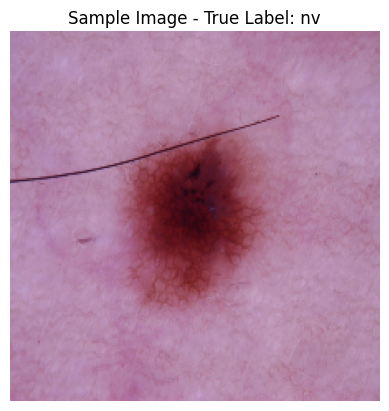

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

if test_df is not None and test_generator is not None: # Check if test_df and test_generator are loaded

    # Get a sample image and its true label from the test set
    sample_index = 0 # You can change this index to select a different sample image
    sample_image_path = test_df['image_path'].iloc[sample_index]
    sample_true_label_index = test_df['label'].iloc[sample_index] # String label index
    sample_true_label_category = label_diagnosis_mapping[int(sample_true_label_index)] # Map index back to category name

    print(f"Visualizing Grad-CAM for sample image at index: {sample_index}")
    print(f"Image path: {sample_image_path}")
    print(f"True label category: {sample_true_label_category} (index: {sample_true_label_index})")

    # Load and preprocess the sample image for model input
    sample_image = image.load_img(sample_image_path, target_size=IMG_SIZE) # Load image, resize to IMG_SIZE
    sample_image_array = image.img_to_array(sample_image) # Convert PIL image to numpy array
    sample_image_expanded = np.expand_dims(sample_image_array, axis=0) # Add batch dimension (model expects batch of images)
    sample_image_preprocessed = sample_image_expanded / 255.0  # Manually rescale to [0, 1] - REPLACED LINE

    # Display the sample image
    plt.imshow(sample_image)
    plt.title(f"Sample Image - True Label: {sample_true_label_category}")
    plt.axis('off') # Turn off axis numbers and ticks
    plt.show()

else:
    print("Test DataFrame or test data generator not loaded. Please run Step 3.8 first.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
Predicted class category: nv (index: 5) with probability: 70.44%
Shape of heatmap_resized: (224, 224)
Shape of original_image_array_gray: (224, 224)
Data type of heatmap_resized: uint8
Data type of original_image_array_gray: uint8


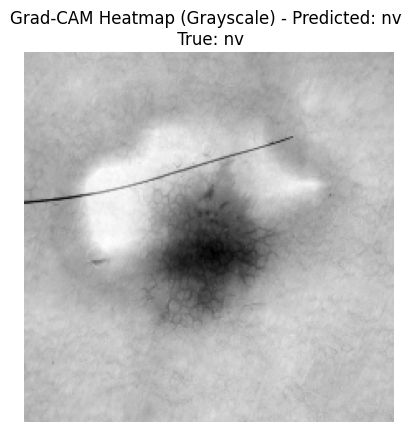

Grad-CAM heatmap generated and displayed (simplified grayscale overlay with matplotlib and OpenCV).


In [ ]:
from tf_explain.core.grad_cam import GradCAM
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf # Import tensorflow for tf.image.resize and tf.newaxis
from tensorflow.keras.preprocessing import image
import cv2 # Import OpenCV - make sure you have this import!

if model is not None and sample_image_preprocessed is not None and label_diagnosis_mapping is not None: # Check if model, preprocessed image, and label mapping are loaded

    # Initialize Grad-CAM explainer
    grad_cam_explainer = GradCAM()

    # Get the predicted class index for the sample image
    predictions = model.predict(sample_image_preprocessed)
    predicted_class_index = np.argmax(predictions[0]) # Index of the class with highest probability
    predicted_class_category = label_diagnosis_mapping[predicted_class_index] # Map index back to category name
    predicted_probability = predictions[0][predicted_class_index] * 100 # Probability of the predicted class in percent

    print(f"Predicted class category: {predicted_class_category} (index: {predicted_class_index}) with probability: {predicted_probability:.2f}%")

    # Generate Grad-CAM heatmap - Grayscale heatmap
    # target_layer is usually the last convolutional layer - in MobileNetV2, it's 'out_relu'
    grad_cam_heatmap = grad_cam_explainer.explain(
        validation_data=(sample_image_preprocessed, None), # Pass preprocessed image and None for labels
        model=model,
        class_index=predicted_class_index, # Explain for the predicted class
        layer_name='out_relu' # Target layer - last conv layer in MobileNetV2
        # Removed: use_gradient_tape=True - because it was causing a TypeError
    )

    # --- Simplified Grayscale Heatmap Overlay using Matplotlib and OpenCV ---
    # Resize heatmap to match original image size - Grayscale heatmap (2D shape: 224x224) - FINAL RESIZE CORRECTION
    heatmap_resized = tf.image.resize(grad_cam_heatmap[..., 0, tf.newaxis], IMG_SIZE).numpy()[:,:,0] # Resize to 2D grayscale - CORRECTED RESIZE LINE

    heatmap_resized_uint8 = np.uint8(heatmap_resized) # Convert heatmap_resized to uint8 - DATA TYPE CORRECTION!

    # Convert original image to grayscale
    original_image = image.load_img(sample_image_path, target_size=IMG_SIZE, color_mode='grayscale') # Load original as grayscale
    original_image_array_gray = np.array(original_image) # Get numpy array

    # DEBUG PRINTS - ADDED TO CHECK SHAPES AND DATA TYPES - KEEP THESE FOR VERIFICATION
    print(f"Shape of heatmap_resized: {heatmap_resized.shape}")
    print(f"Shape of original_image_array_gray: {original_image_array_gray.shape}")
    print(f"Data type of heatmap_resized: {heatmap_resized_uint8.dtype}") # Print uint8 data type
    print(f"Data type of original_image_array_gray: {original_image_array_gray.dtype}")

    # Simple addition overlay in grayscale using OpenCV - USING uint8 HEATMAP
    overlayed_image_gray = cv2.addWeighted(heatmap_resized_uint8, 0.5, original_image_array_gray, 0.5, 0) # OpenCV for weighted addition

    plt.imshow(overlayed_image_gray, cmap='gray') # Display grayscale overlay with 'gray' colormap
    plt.title(f"Grad-CAM Heatmap (Grayscale) - Predicted: {predicted_class_category} \n True: {sample_true_label_category}")
    plt.axis('off')
    plt.show()

    print("Grad-CAM heatmap generated and displayed (simplified grayscale overlay with matplotlib and OpenCV).")

else:
    print("Model, preprocessed sample image, or label mapping not loaded. Please run previous steps first.")

In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.199.253.91:8501

  Stopping...
  Stopping...


In [ ]:
!pip freeze > requirements.txt
print("Created requirements.txt file.")

Created requirements.txt file.
